# Feature Selection Methods project - Test Environment
Author: Yuval Uner

# Importing libraries

Import all of the libraries required for the project, both external libraries as well as the local libraries developed for the project.

## External libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, max_error, log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector, VarianceThreshold

## Local libraries

In [2]:
from data_pre_processing import PreprocessingPipeline
from filter_methods import WeightedCombination, VarianceInflationFactor
from deep_network_methods import LinearAgent, SequentialAgent
from shap_values_methods import BaseMethod, BranchingVariant, BacktrackingVariant

# Select the dataset, preprocess the data, and choose the model and metrics
Select one of the datasets below, load the data and and preprocess it, then select the relevant model and metrics to use for the task. <br/>
The datasets are divided into 2 categories: linear regression datasets and classification datasets. <br/>
For each category, there are 2 datasets to choose from. <br/>
Please choose only one dataset, and follow the model selection and metric selection steps of the category it belongs to.<br/>
<br/>
All datasets go through the same preprocessing pipeline, which performs the following (in order):
1. Convert categorical features to one-hot encoding
2. Impute missing values by replacing them with the mean of the column
3. Remove features with high collinearity between them. By default, this threshold is set to 0.9.
At the end of the pipeline, the preprocessed data is returned, along with a list of which of the remaining columns are categorical and which are numerical.<br/>

The data can then optionally be normalized using sklearn's StandardScaler.<br/>

## Linear Regression datasets
You may choose of either of the 2 datasets below:
1. Housing dataset. This is the dataset used in class. The same 10 features as used in the introduction lecture are used, as otherwise the dataset has too many features to handle in a reasonable amount of time by the more time consuming methods.
2. Medical Cost Personal dataset (https://www.kaggle.com/datasets/mirichoi0218/insurance). This dataset contains 7 features, 3 of which are categorical, and 1338 rows. It contains information about patients, with the target variable being the cost of their medical treatment.

### Selecting the dataset - please choose one of the following datasets

#### Housing dataset

Load the dataset and select only the relevant columns

In [3]:
data = pd.read_csv('data/data_houses.csv', index_col="Id")
cols = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","FullBath","YearBuilt","YearRemodAdd",
        "LotFrontage","MSSubClass", "SalePrice"]
data = data[cols]

Set the target variable

In [4]:
target = 'SalePrice'

For using the sequential agent - select the feature by which to sequence the data. This can be skipped if not using the sequential agent.<br/>
In this case, the feature chosen is YearBuilt, as it may make sense that houses built in different years may have different distributions of features.

In [5]:
sequence_by = 'YearBuilt'

Next, preprocess the data using the preprocessing pipeline.

In [6]:
preprocessor = PreprocessingPipeline(data, ['MSSubClass', 'FullBath'], 0.9, target_name='SalePrice')

In [7]:
data, continuous_cols, cat_cols = preprocessor.preprocess()

#### Medical Cost Personal dataset

Load the dataset

In [ ]:
data = pd.read_csv('data/insurance.csv')

Set the target variable

In [ ]:
target = 'charges'

For using the sequential agent - select the feature by which to sequence the data. This can be skipped if not using the sequential agent.<br/>
In this case, the feature chosen is age, as it may make sense that patients of different ages may have different distributions of features.

In [ ]:
sequence_by = 'age'

Next, preprocess the data using the preprocessing pipeline.

In [ ]:
preprocessor = PreprocessingPipeline(data, ['sex', 'smoker', 'region'], 0.9, target_name='SalePrice')

In [ ]:
data, continuous_cols, cat_cols = preprocessor.preprocess()

### Model and metric selection
For the linear regression datasets, we use a linear regression model, MSE as the loss function, as well as R2, MAE, Mean Average Percent Error and max error as the evaluation metrics.

In [27]:
model = LinearRegression()
loss_func = mean_squared_error
metrics = [r2_score, mean_absolute_error, mean_absolute_percentage_error, max_error]

## Classification datasets (Logistic Regression)

You may choose of either of the 2 datasets below:
1. Telco customer churn dataset. This dataset contains 19 features, mostly categorical, and 7043 rows. It contains information about customers, with the target variable being whether the customer churned (left the service) or not.
2. Breast cancer dataset. This dataset contains 30 features, all numeric, and 569 rows. It contains information about tumors, with the target variable being whether the tumor is malignant or benign.

### Selecting the dataset - please choose one of the following datasets

#### Telco customer churn dataset

Load the dataset

In [ ]:
data = pd.read_csv('data/telco_customer_churn_logistic.csv')

Set the target variable and remove the id column

In [ ]:
target = 'Churn'
data.drop(columns=['customerID'], inplace=True)

Map the target variable to 0 and 1

In [ ]:
data[target] = data[target].map({'Yes': 1, 'No': 0})

For using the sequential agent - select the feature by which to sequence the data. This can be skipped if not using the sequential agent.<br/>
In this case, the feature chosen is tenure, as it may make sense that customers with longer tenure may have a different distribution of features than customers with shorter tenure.

In [ ]:
sequence_by = 'tenure'

Next, preprocess the data using the preprocessing pipeline.

In [ ]:
preprocessor = PreprocessingPipeline(data,
                                     cat_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                               'Contract', 'PaperlessBilling', 'PaymentMethod'],
                                     threshold=0.9, target_name=target)
data, continuous_cols, cat_cols = preprocessor.preprocess()

#### Breast cancer dataset

Load the dataset

In [ ]:
data = pd.read_csv('data/breast_cancer_logistic.csv', index_col='id')

Set the target variable

In [ ]:
target = 'diagnosis'

Map the target variable to 0 and 1

In [ ]:
data[target] = data[target].map({'M': 1, 'B': 0})

For using the sequential agent - select the feature by which to sequence the data. This can be skipped if not using the sequential agent. <br/>
In this case, the selected feature is perimeter_worst, as it is the most influential feature.

In [ ]:
sequence_by = 'perimeter_worst'

Next, preprocess the data using the preprocessing pipeline.

In [ ]:
preprocessor = PreprocessingPipeline(data, None, 0.9, target_name=target)

In [ ]:
data, continuous_cols, cat_cols = preprocessor.preprocess()

### Model and metric selection
For the classification datasets, we use a logistic regression model, log loss as the loss function, as well as accuracy, precision, recall and F1 score as the evaluation metrics.

In [ ]:
model = LogisticRegression()
loss_func = log_loss
metrics = [accuracy_score, precision_score, recall_score, f1_score]

### Normalization - optional
It is highly recommended to use this normalization step for the classification datasets, as sklearn's LogisticRegression model is sensitive to the scale of the features.<br/>
On the other hand, for the linear regression datasets, this step is entirely optional, as the model used (LinearRegression) is not sensitive to the scale of the features.

In [ ]:
scaler = StandardScaler()
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])

### Split the data

Split the data into training, validation and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, data[target], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Feature Selection

## Filter methods
Filter methods are methods that select features based on some statistical measure calculated from the data. They do not involve training a model, and are therefore computationally less expensive than wrapper methods. <br/>
The filter methods implemented in this project are:
1. A weighted sum of correlation and mutual information
2. Variance Inflation Factor (VIF)

Both methods have tunable hyperparameters, which may be adjusted or optimized automatically using the provided methods.<br/>
<br/>
The end of this section contains an evaluation, allowing you to compare the model's performance with and without feature selection using the selected method, as well as compare to sklearn's SelectKBest method.

### Weighted Sum Method

#### Method description
This method computes a weighted sum between the mutual information and the correlation of each feature with the target variable. <br/>
It has a weight parameter $\alpha$, such that the score of each feature is computed as 
$$\alpha \cdot \text{correlation} + (1-\alpha) \cdot \text{mutual information}$$
The value of $\alpha$ is set to 0.5 by default, but can be adjusted by the user.<br/>
<br/>
The algorithm has 2 more hyperparameters - the maximum number of features to select, and a score threshold (features with a score below this threshold are removed).<br/>
Both are set to 0 by default, but at least one of them must be set by the user.

#### Method usage

Instantiate the WeightedCombination class, and fit it to the data.

In [10]:
feature_selector = WeightedCombination(correlation_weight=0.5)

If the target was removed from the data during the preprocessing step, add it back to the data, as this method requires the target to be present in the data.

In [11]:
if target not in X_train.columns:
    X_train[target] = y_train
    X_val[target] = y_val

In [12]:
feature_selector.fit(X_train, target_column=target, continuous_cols=continuous_cols,categorical_cols= cat_cols)

Next, you can either run the following cell select features using the current hyperparameters:

In [ ]:
X_train_after_selection, selected_features, feature_scores = feature_selector.transform(X_train, y_train, continuous_cols, cat_cols)

Or you can use the following cell to run the hyperparameter optimization process, which will run a grid search over the hyperparameters and select the best ones.<br/>
By default, this process will not optimize the score threshold, as it is computationally expensive. If you wish to optimize it, set the optimize_threshold parameter to True.

In [13]:
X_transformed, selected_features, feature_scores, best_weight, best_loss, best_num_features, best_threshold, history = feature_selector.auto_optimize(X_train, y_train, X_val, y_val, model=model, loss_function=loss_func)

Weight: 0.0, Num features: 1, Loss: 1844084662.4134595
Weight: 0.0, Num features: 2, Loss: 1215281400.2556722
Weight: 0.0, Num features: 3, Loss: 1210181390.478759
Weight: 0.0, Num features: 4, Loss: 1026953269.2852848
Weight: 0.0, Num features: 5, Loss: 972311417.6178817
Weight: 0.0, Num features: 6, Loss: 958374541.9687688
Weight: 0.0, Num features: 7, Loss: 988624766.9849316
Weight: 0.0, Num features: 8, Loss: 862043703.6386098
Weight: 0.0, Num features: 9, Loss: 835926857.6441351
Weight: 0.0, Num features: 10, Loss: 836136329.8139801
Weight: 0.0, Num features: 11, Loss: 838216081.1962976
Weight: 0.0, Num features: 12, Loss: 839641541.4168797
Weight: 0.0, Num features: 13, Loss: 837647527.1685822
Weight: 0.0, Num features: 14, Loss: 897840514.1533854
Weight: 0.0, Num features: 15, Loss: 898416405.3840858
Weight: 0.0, Num features: 16, Loss: 882834072.2272933
Weight: 0.0, Num features: 17, Loss: 881313097.588603
Weight: 0.0, Num features: 18, Loss: 871605798.9294363
Weight: 0.0, Num 

If you ran the optimization process, you also get a history of the optimization process, which you can plot using the following cell.<br/>
This gives a nice visualization of the loss as a function of the hyperparameters, showing if and how the model performs with less features, or with a different weight between correlation and mutual information.

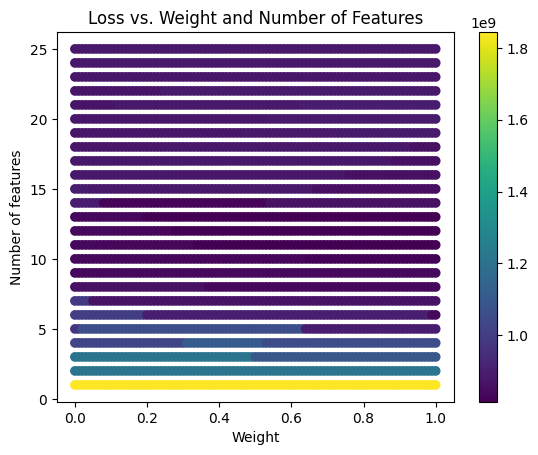

In [17]:
weights, num_features = np.meshgrid(history.columns, history.index)
plt.scatter(weights, num_features, c=history.values, cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Number of features')
plt.title('Loss vs. Weight and Number of Features')
plt.colorbar()
plt.show()

### Variance Inflation Factor

#### Method description
Variance Inflation Factor (VIF) is a measure of multicollinearity among the features. It measures how much the variance of the estimated coefficients of a feature is increased due to multicollinearity. <br/>
Generally, a VIF of 1 indicates no multicollinearity, while a VIF of above 5-10 indicates high multicollinearity, and the feature should be removed. <br/>
This method computes the VIF of each feature, and removes all features with a VIF above or below a certain threshold (up to the user's choice). The threshold is set to 5 by default, but can be adjusted by the user or optimized automatically.<br/>
The method also has a hyperparameter to select the maximum number of features to keep, which is set to 0 by default, meaning all features with a VIF below the threshold will be kept.<br/>
<br/>
The user can choose whether the comparison direction is 'above' or 'below' the threshold, meaning whether to remove features with a VIF above or below the threshold. The default is 'above'.<br/>
This is done because depending on the dataset, a high VIF may indicate that the feature contains important information, despite the multicollinearity, and from empirical observations, it seems that some datasets perform much better when removing features with a VIF below the threshold instead of above it.

#### Method usage

Instantiate the VarianceInflationFactor class, and fit it to the data.

In [68]:
feature_selector = VarianceInflationFactor()

In [25]:
feature_selector.fit(X_train)

Next, you can either run the following cell select features using the current hyperparameters:

In [ ]:
selected_features = feature_selector.predict(X_train, threshold=5, max_features=0, less_than_threshold_comparison=True)

Or you can use the following cell to run the hyperparameter optimization process, which will run a grid search over the hyperparameters and select the best ones.<br/>

In [26]:
selected_features, best_loss, best_threshold, best_num_features, best_comparison_direction,history_less_than_comparisons, history_greater_than_comparisons = feature_selector.auto_optimize(X_train, y_train, X_val, y_val, model=model, loss_function=loss_func)

Threshold: 0.5, Num features: 1, Less than comparison: True, Loss: inf
Threshold: 0.5, Num features: 1, Less than comparison: False, Loss: 3663609724.5379634
Threshold: 0.5, Num features: 2, Less than comparison: True, Loss: inf
Threshold: 0.5, Num features: 2, Less than comparison: False, Loss: 3198131161.2612624
Threshold: 0.5, Num features: 3, Less than comparison: True, Loss: inf
Threshold: 0.5, Num features: 3, Less than comparison: False, Loss: 1759421367.6478114
Threshold: 0.5, Num features: 4, Less than comparison: True, Loss: inf
Threshold: 0.5, Num features: 4, Less than comparison: False, Loss: 1038763932.6164589
Threshold: 0.5, Num features: 5, Less than comparison: True, Loss: inf
Threshold: 0.5, Num features: 5, Less than comparison: False, Loss: 996172222.9089215
Threshold: 0.5, Num features: 6, Less than comparison: True, Loss: inf
Threshold: 0.5, Num features: 6, Less than comparison: False, Loss: 951430814.8321953
Threshold: 0.5, Num features: 7, Less than comparison:

If you ran the optimization process, you also get a history of the optimization process, which you can plot using the following cell.<br/>
This gives a nice visualization of the loss as a function of the hyperparameters, showing if and how the model performs with less features, with a different threshold, or with a different comparison direction.

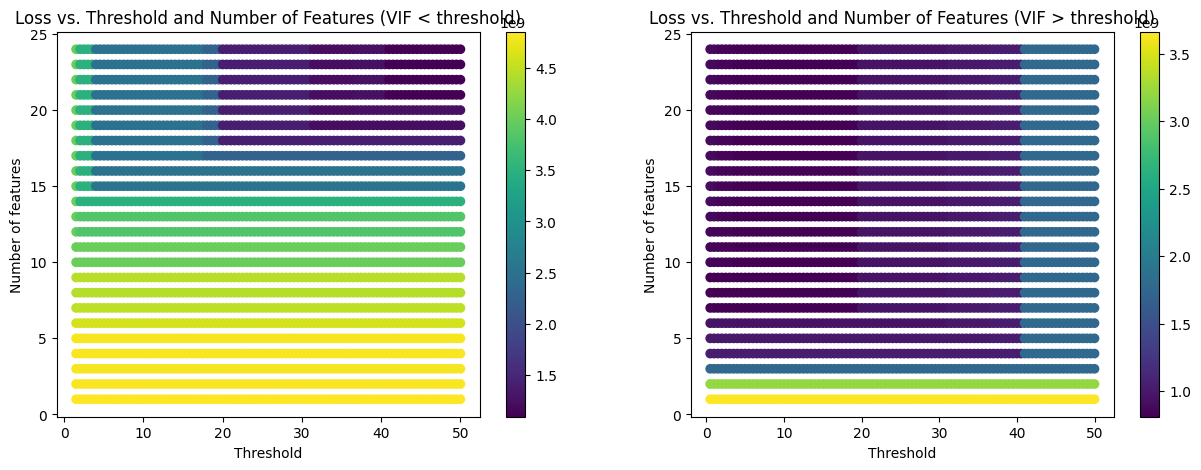

In [31]:
thresholds, num_features = np.meshgrid(history_less_than_comparisons.columns, history_less_than_comparisons.index)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Number of features')
ax[0].set_title('Loss vs. Threshold and Number of Features (VIF < threshold)')
fig.colorbar(ax[0].scatter(thresholds, num_features, c=history_less_than_comparisons.values, cmap='viridis'))

thresholds, num_features = np.meshgrid(history_greater_than_comparisons.columns, history_greater_than_comparisons.index)
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Number of features')
ax[1].set_title('Loss vs. Threshold and Number of Features (VIF > threshold)')
fig.colorbar(ax[1].scatter(thresholds, num_features, c=history_greater_than_comparisons.values, cmap='viridis'))
plt.show()

### Method evaluation

Next, to evaluate the method, we first need to drop the target feature from the data.

In [14]:
if target in X_train.columns:
    X_train = X_train.drop(columns=[target])
    X_val = X_val.drop(columns=[target])
    X_test = X_test.drop(columns=[target])

We can see how many features we have now, and which features were selected.

In [15]:
print(f'Number of features selected: {len(selected_features)}')
print(f'Selected features: {selected_features}')

Number of features selected: 12
Selected features: Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'FullBath_1', 'YearBuilt', 'YearRemodAdd', 'MSSubClass_60',
       'LotFrontage', 'FullBath_3', 'MSSubClass_30'],
      dtype='object')


Select the relevant features, and evaluate the method by training a model using the selected features.

In [16]:
# Reset the model, to make sure it is not influenced by the previous training
model = model.__class__()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
loss = loss_func(y_test, y_pred)
with_feature_selection = {metric.__name__: metric(y_test, y_pred) for metric in metrics}
with_feature_selection[loss_func.__name__] = loss
with_feature_selection['Number of features'] = len(selected_features)
print(f"Metrics with feature selection: {with_feature_selection}")

Metrics with feature selection: {'r2_score': 0.8087184741132335, 'mean_absolute_error': 24824.893831973033, 'mean_absolute_percentage_error': 0.14363262773378868, 'max_error': 267826.66760662873, 'mean_squared_error': 1747670403.0705264}


Compare to a baseline model, which uses all of the features.

In [17]:
model = model.__class__()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
loss = loss_func(y_test, y_pred)
without_feature_selection = {metric.__name__: metric(y_test, y_pred) for metric in metrics}
without_feature_selection[loss_func.__name__] = loss
without_feature_selection['Number of features'] = len(X_train.columns)
print(f"Metrics without feature selection: {without_feature_selection}")

Metrics without feature selection: {'r2_score': 0.8032378398778205, 'mean_absolute_error': 25263.788761485946, 'mean_absolute_percentage_error': 0.1437534805924119, 'max_error': 264032.5522353125, 'mean_squared_error': 1797744983.9736323}


Finally, compare to sklearn's VarianceThreshold method (while SelectKBest is also available, it is not used here as it requires knowledge of whether the target is continuous or categorical, which is not always known).

In [18]:
selector = VarianceThreshold(threshold=0.8)
selector.fit(X_train)
selected_features_sklearn = X_train.columns[selector.get_support()]
print(f'Selected features using VarianceThreshold: {selected_features_sklearn}')

Selected features using VarianceThreshold: Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd', 'LotFrontage'],
      dtype='object')


In [19]:
model = model.__class__()
model.fit(X_train[selected_features_sklearn], y_train)
y_pred = model.predict(X_test[selected_features_sklearn])
loss = loss_func(y_test, y_pred)
with_feature_selection_sklearn = {metric.__name__: metric(y_test, y_pred) for metric in metrics}
with_feature_selection_sklearn[loss_func.__name__] = loss
with_feature_selection_sklearn['Number of features'] = len(selected_features_sklearn)
print(f"Metrics with feature selection using VarianceThreshold: {with_feature_selection_sklearn}")

Metrics with feature selection using VarianceThreshold: {'r2_score': 0.7897977382491598, 'mean_absolute_error': 25147.11868680741, 'mean_absolute_percentage_error': 0.14392958806285527, 'max_error': 302285.4505203988, 'mean_squared_error': 1920542351.4756835}


Visualize the results in a table

In [20]:
results = pd.DataFrame([with_feature_selection, without_feature_selection, with_feature_selection_sklearn], index=[f'Feature selection: {feature_selector.__name__}', 'Without feature selection', 'VarianceThreshold'])
results

,r2_score,mean_absolute_error,mean_absolute_percentage_error,max_error,mean_squared_error
Feature selection: WeightedCombination,0.808718,24824.893832,0.143633,267826.667607,1.747670e+09
Without feature selection,0.803238,25263.788761,0.143753,264032.552235,1.797745e+09
VarianceThreshold,0.789798,25147.118687,0.143930,302285.450520,1.920542e+09


## Deep Reinforcement Learning methods
Feature selection can be described as a prediction problem, where a model needs to predict which subset of features will lead to the best performance. <br/>
To do this in an interpretable way using neural networks, there needs to be a "disconnect" between the feature selection model and the model that uses the selected features, thus making it impossible to directly compute gradients for the feature selection model. <br/>
Thus, reinforcement learning was used.<br/>
<br/>
There are 2 methods implemented in this project:
1. LinearAgent
2. SequentialAgent

All methods were implemented using the StableBaselines3 library, which is a PyTorch-based library for reinforcement learning.

### LinearAgent

#### Method description
LinearAgent uses a linear model as a feature extractor for the feature selection task. <br/>
The agent is trained via either the A2C or PPO policies.<br/>
The environment's action space is a binary vector, where each element corresponds to a feature, and the agent can choose to select or not select each feature.<br/>
The environment's observation space is a batch of data.<br/>
Each step the agent predicts features by a batch of data, and the environment returns the reward, which is the performance of the downstream model on the selected features. An episode is a full pass over the data (one epoch).<br/>
<br/>
It uses a default network architecture, where the input layer is the number of features, and each subsequent layer has half the number of neurons as the previous layer, until reaching the size of the output layer (the number of features). Additionally, the network uses ReLU activations and has a layer normalization layer after every 2 layers.<br/>
<br/>
the user can customize Both the network and the environment, by passing the relevant classes to the agent's constructor.<br/>

#### Method usage

Set the batch size for the agent

In [61]:
batch_size = 512

Instantiate the LinearAgent class

In [62]:
lin_agent = LinearAgent(X_train, y_train, LinearRegression(), mean_squared_error, batch_size=batch_size, agent_type='A2C',save_path="models/linear_agent", eval_freq=500)
print(lin_agent.agent.policy)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
ActorCriticPolicy(
  (features_extractor): DefaultFullyConnectedNetwork()
  (pi_features_extractor): DefaultFullyConnectedNetwork()
  (vf_features_extractor): DefaultFullyConnectedNetwork()
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=24, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=24, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=24, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)


Train the agent over a certain number of steps

In [63]:
lin_agent.learn(num_steps=2000)

C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=500, episode_reward=-4215632384.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.22e+09 |
| time/                 |           |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -16.6     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -5.14e+10 |
|    value_loss         | 1.19e+19  |
-------------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -5.92e+09 |
| time/              |           |
|    fps             | 14        |
|    iterations      | 100       |
|    time_elapsed    | 33        |
|    total_timesteps | 500       |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-4187564928.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.19e+09 |
| time/                 |           |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -16.5     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -6.17e+10 |
|    value_loss         | 1.51e+19  |
-------------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -5.59e+09 |
| time/              |           |
|    fps             | 15        |
|    iterations      | 200       |
|    time_elapsed    | 63        |
|    total_timesteps | 1000      |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1500, episode_reward=-4116680832.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.12e+09 |
| time/                 |           |
|    total_timesteps    | 1500      |
| train/                |           |
|    entropy_loss       | -16.5     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 299       |
|    policy_loss        | -5.16e+10 |
|    value_loss         | 1.16e+19  |
-------------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3        |
|    ep_rew_mean     | -5.6e+09 |
| time/              |          |
|    fps             | 14       |
|    iterations      | 300      |
|    time_elapsed    | 101      |
|    total_timesteps | 1500     |
---------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2000, episode_reward=-4140519168.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.14e+09 |
| time/                 |           |
|    total_timesteps    | 2000      |
| train/                |           |
|    entropy_loss       | -15.9     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 399       |
|    policy_loss        | -4.31e+10 |
|    value_loss         | 9.01e+18  |
-------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -5.12e+09 |
| time/              |           |
|    fps             | 14        |
|    iterations      | 400       |
|    time_elapsed    | 140       |
|    total_timesteps | 2000      |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2500, episode_reward=-4306061568.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.31e+09 |
| time/                 |           |
|    total_timesteps    | 2500      |
| train/                |           |
|    entropy_loss       | -16       |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 499       |
|    policy_loss        | -4.96e+10 |
|    value_loss         | 1.07e+19  |
-------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -5.19e+09 |
| time/              |           |
|    fps             | 14        |
|    iterations      | 500       |
|    time_elapsed    | 169       |
|    total_timesteps | 2500      |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3000, episode_reward=-4087582464.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.09e+09 |
| time/                 |           |
|    total_timesteps    | 3000      |
| train/                |           |
|    entropy_loss       | -16       |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 599       |
|    policy_loss        | -4e+10    |
|    value_loss         | 8.07e+18  |
-------------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -5.16e+09 |
| time/              |           |
|    fps             | 15        |
|    iterations      | 600       |
|    time_elapsed    | 198       |
|    total_timesteps | 3000      |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3500, episode_reward=-4090631040.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.09e+09 |
| time/                 |           |
|    total_timesteps    | 3500      |
| train/                |           |
|    entropy_loss       | -15.4     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 699       |
|    policy_loss        | -4.19e+10 |
|    value_loss         | 8.6e+18   |
-------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -4.89e+09 |
| time/              |           |
|    fps             | 15        |
|    iterations      | 700       |
|    time_elapsed    | 227       |
|    total_timesteps | 3500      |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4000, episode_reward=-4258831104.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.26e+09 |
| time/                 |           |
|    total_timesteps    | 4000      |
| train/                |           |
|    entropy_loss       | -14.1     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 799       |
|    policy_loss        | -4e+10    |
|    value_loss         | 7.86e+18  |
-------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3         |
|    ep_rew_mean     | -4.55e+09 |
| time/              |           |
|    fps             | 15        |
|    iterations      | 800       |
|    time_elapsed    | 256       |
|    total_timesteps | 4000      |
----------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4500, episode_reward=-4312053888.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.31e+09 |
| time/                 |           |
|    total_timesteps    | 4500      |
| train/                |           |
|    entropy_loss       | -13.4     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 899       |
|    policy_loss        | -3.61e+10 |
|    value_loss         | 9.23e+18  |
-------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3        |
|    ep_rew_mean     | -4.5e+09 |
| time/              |          |
|    fps             | 15       |
|    iterations      | 900      |
|    time_elapsed    | 285      |
|    total_timesteps | 4500     |
---------------------------------


C:\Users\Yuval\PycharmProjects\TDS_Final_Project\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-4491313920.00 +/- 0.00
Episode length: 3.00 +/- 0.00
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 3         |
|    mean_reward        | -4.49e+09 |
| time/                 |           |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -12.9     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 999       |
|    policy_loss        | -3.33e+10 |
|    value_loss         | 8.04e+18  |
-------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3        |
|    ep_rew_mean     | -4.4e+09 |
| time/              |          |
|    fps             | 15       |
|    iterations      | 1000     |
|    time_elapsed    | 314      |
|    total_timesteps | 5000     |
---------------------------------


Optionally, save the model. This is useful if you want to continue training later, or if you want to load the model for evaluation.<br/>
There is a load method, which can be used to load the model.

In [ ]:
lin_agent.save(model_name="end_of_training")

Predict the features on a batch of data, sampled from the data

In [71]:
X_train_sample = X_train.sample(batch_size)

In [72]:
action = lin_agent.predict(X_train_sample, deterministic=True)
selected_features = X_train.columns[action == 1]
print(f'Number of selected features: {len(selected_features)}, Selected features: {selected_features}')

Number of selected features: 15, Selected features: Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt',
       'YearRemodAdd', 'LotFrontage', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_190'],
      dtype='object')


#### Method evaluation

Evaluate the method by training a model using the selected features

In [73]:
# Reset the model, to make sure it is not influenced by the previous training
model = model.__class__()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
loss = loss_func(y_test, y_pred)
with_feature_selection = {metric.__name__: metric(y_test, y_pred) for metric in metrics}
with_feature_selection[loss_func.__name__] = loss
with_feature_selection['Number of features'] = len(selected_features)
print(f"Metrics with feature selection: {with_feature_selection}")

Metrics with feature selection: {'r2_score': 0.7674963472738269, 'mean_absolute_error': 26757.978652388814, 'mean_absolute_percentage_error': 0.1531995267387519, 'max_error': 310236.7040966458, 'mean_squared_error': 2124302127.9319093, 'Number of features': 15}


Compare to a baseline model, which uses all of the features

In [74]:
model = model.__class__()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
loss = loss_func(y_test, y_pred)
without_feature_selection = {metric.__name__: metric(y_test, y_pred) for metric in metrics}
without_feature_selection[loss_func.__name__] = loss
without_feature_selection['Number of features'] = len(X_train.columns)
print(f"Metrics without feature selection: {without_feature_selection}")

Metrics without feature selection: {'r2_score': 0.8032378398778205, 'mean_absolute_error': 25263.788761485946, 'mean_absolute_percentage_error': 0.1437534805924119, 'max_error': 264032.5522353125, 'mean_squared_error': 1797744983.9736323, 'Number of features': 24}


Compare to sklearn's Recursive Feature Elimination method

In [75]:
selector = SequentialFeatureSelector(model.__class__())
selector.fit(X_train, y_train)
selected_features_sklearn = X_train.columns[selector.support_]
print(f'Selected features using Sequential Feature Selector: {selected_features_sklearn}')

Selected features using Sequential Feature Selector: Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd', 'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'FullBath_3'],
      dtype='object')


In [76]:
model = model.__class__()
model.fit(X_train[selected_features_sklearn], y_train)
y_pred = model.predict(X_test[selected_features_sklearn])
loss = loss_func(y_test, y_pred)
with_feature_selection_sklearn = {metric.__name__: metric(y_test, y_pred) for metric in metrics}
with_feature_selection_sklearn[loss_func.__name__] = loss
with_feature_selection_sklearn['Number of features'] = len(selected_features_sklearn)
print(f"Metrics with feature selection using Sequential Feature Selector: {with_feature_selection_sklearn}")

Metrics with feature selection using Sequential Feature Selector: {'r2_score': 0.8009941672578842, 'mean_absolute_error': 25181.713719251777, 'mean_absolute_percentage_error': 0.1394438803044302, 'max_error': 265985.917502437, 'mean_squared_error': 1818244612.5387225, 'Number of features': 12}


Visualize the results in a table

In [77]:
results = pd.DataFrame([with_feature_selection, without_feature_selection, with_feature_selection_sklearn], index=[f'Feature selection: {lin_agent.__class__.__name__}', 'Without feature selection', 'Sequential Feature Selector'])
results

,r2_score,mean_absolute_error,mean_absolute_percentage_error,max_error,mean_squared_error,Number of features
Feature selection: LinearAgent,0.767496,26757.978652,0.153200,310236.704097,2.124302e+09,15
Without feature selection,0.803238,25263.788761,0.143753,264032.552235,1.797745e+09,24
Sequential Feature Selector,0.800994,25181.713719,0.139444,265985.917502,1.818245e+09,12
